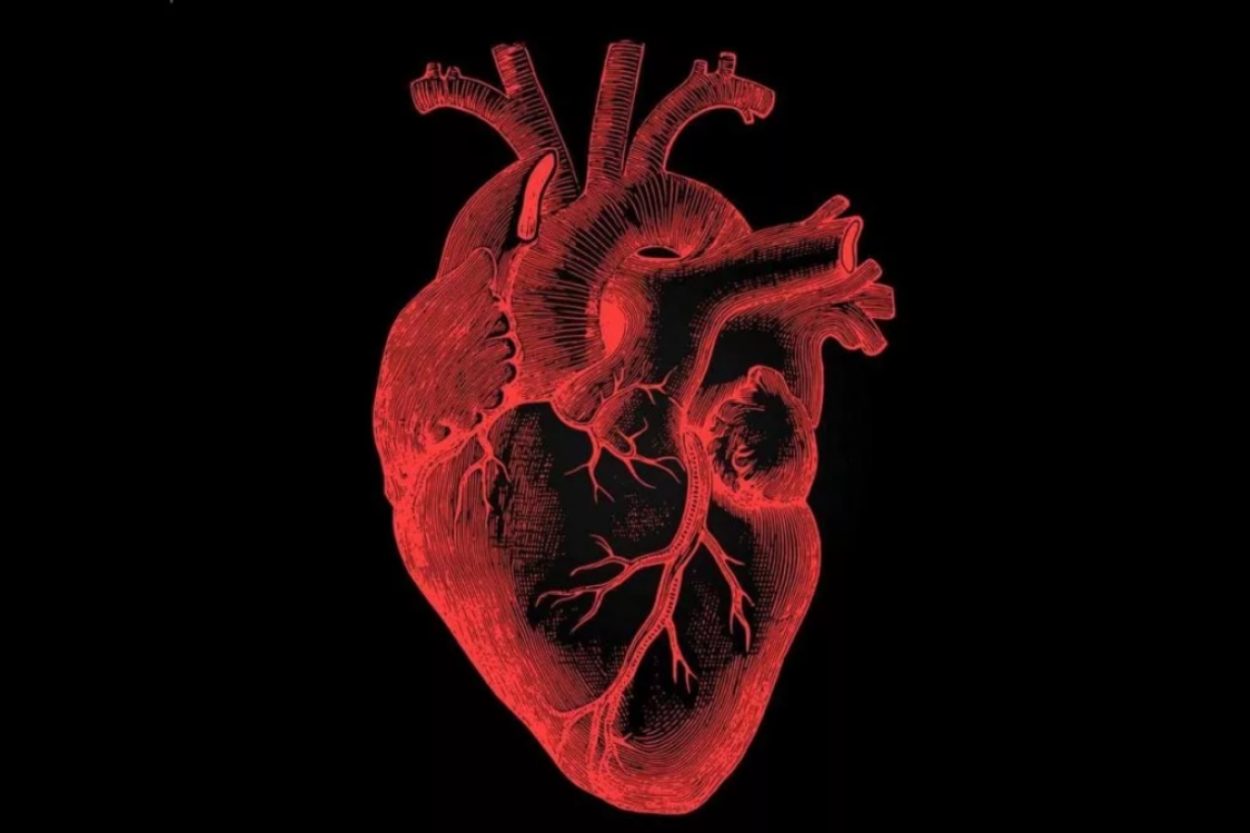

In [1]:
from IPython.display import Image
Image("1555416316303ec8f24c7b5a99a29b2f603d51cd8dfe9.jpg")

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 1 [15 min]</h3> <br/>Import all necessary <code>packages</code> and get first look at you <code>dataset</code> 
    <br/> <span style="color:#00a0e5">(Ваша задача - подключить все необходимые пакеты и получить представление о данных) </span>
    </span>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 2 [25 min]</h3> <br/>Data editing -  <code>clean</code>, <code>change the formats</code>, <code>drop outliers</code> and <code>drop NANs</code> in your dataset
    <br/> <span style="color:#00a0e5">(Очистите бесполезные данные, обработайте аутлайеры, приведите в нужный формат и удалите NANы) </span>
    </span>

In [3]:
df = pd.read_csv('data/cardio.csv', sep=';', index_col='id')

In [4]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393.0,2,168.0,62.0,110.0,80.0,1,1.0,0,0,1,0
1,20228.0,1,156.0,85.0,140.0,90.0,3,1.0,0,0,1,1
2,18857.0,1,165.0,64.0,130.0,70.0,3,1.0,0,0,0,1
3,17623.0,2,169.0,82.0,150.0,100.0,1,1.0,0,0,1,1
4,17474.0,1,156.0,NaN,100.0,60.0,1,1.0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            69999 non-null float64
gender         70000 non-null int64
height         69985 non-null float64
weight         69977 non-null float64
ap_hi          69985 non-null float64
ap_lo          69982 non-null float64
cholesterol    70000 non-null int64
gluc           69999 non-null float64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 6.9 MB


In [6]:
for i in df:
    print("Is null(%):")
    print(i, np.mean(df[i].isna()))
    print(f'unique: {df[i].nunique()}')
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
df.dropna(inplace=True)

Is null(%):
age 1.4285714285714285e-05
unique: 8077
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
gender 0.0
unique: 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
height 0.00021428571428571427
unique: 114
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
weight 0.00032857142857142856
unique: 287
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
ap_hi 0.00021428571428571427
unique: 154
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
ap_lo 0.00025714285714285715
unique: 157
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
cholesterol 0.0
unique: 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
gluc 1.4285714285714285e-05
unique: 3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
smoke 0.0
unique: 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
alco 0.0
unique: 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
active 0.0
unique: 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Is null(%):
cardio 0.0
unique: 2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


В нескольких колонках имеются незначительные пропуски, поэтому мы можем их убрать из выборки

In [7]:
df['age'] = df['age']/365

Признак `age` имеет неправильный формат.<br>
Мы можем привести его к нормальному виду

In [8]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000,69933.000000
mean,53.412323,1.349606,164.870791,74.202198,128.831682,96.654441,1.366651,1.226259,0.088084,0.053809,0.803684,0.499578
std,20.458658,0.476849,89.217318,14.393118,154.137368,188.580771,0.680054,0.572053,0.283419,0.225641,0.397214,0.500003
min,29.583562,1.000000,16.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5159.726027,2.000000,17300.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Из таблицы видно сразу несколько признаков с выбросами

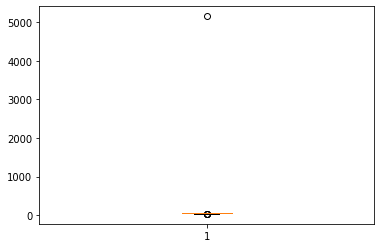

In [9]:
plt.boxplot(df['age'])
df.drop(df[(df['age']> df['age'].quantile(q=.95))|(df['age']<df['age'].quantile(q=.05))].index, inplace=True)

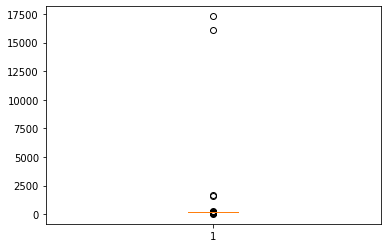

In [10]:
plt.boxplot(df['height'])
df.drop(df[(df['height']> df['height'].quantile(q=.95))|(df['height']<df['height'].quantile(q=.05))].index, 
        inplace=True)

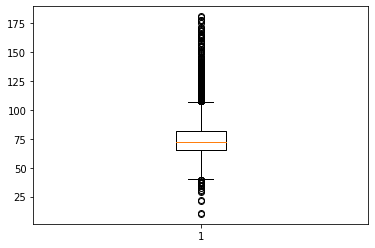

In [11]:
plt.boxplot(df['weight'])
df.drop(df[(df['weight']> df['weight'].quantile(q=.95))|(df['weight']<df['weight'].quantile(q=.05))].index, 
        inplace=True)

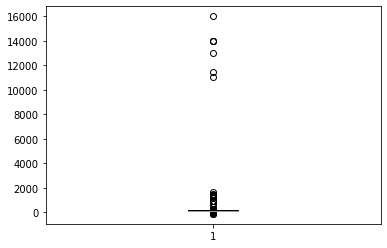

In [12]:
plt.boxplot(df['ap_hi'])
df.drop(df[(df['ap_hi']> df['ap_hi'].quantile(q=.95))|(df['ap_hi']<df['ap_hi'].quantile(q=.05))].index, 
        inplace=True)

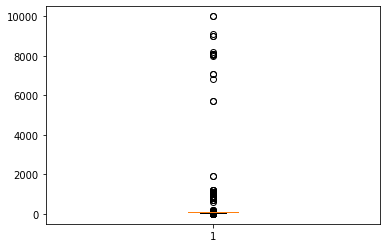

In [13]:
plt.boxplot(df['ap_lo'])
df.drop(df[(df['ap_lo']> df['ap_lo'].quantile(q=.95))|(df['ap_lo']<df['ap_lo'].quantile(q=.05))].index, 
        inplace=True)

Мы убираем все объекты со значение признака `0.5 > x` или `0.95 < x` квантиля (т.е. выбросы)

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 3 [25 min]</h3> <br/>Handling missing values in your dataset - describe your policy
    <br/> <span style="color:#00a0e5">(Восстановите пропущенные данные - опишите по какому принципу вы восстанавливали данные) </span>
    </span>

Так как у нас было мало пропусков, я их отбросил 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47263 entries, 0 to 99998
Data columns (total 12 columns):
age            47263 non-null float64
gender         47263 non-null int64
height         47263 non-null float64
weight         47263 non-null float64
ap_hi          47263 non-null float64
ap_lo          47263 non-null float64
cholesterol    47263 non-null int64
gluc           47263 non-null float64
smoke          47263 non-null int64
alco           47263 non-null int64
active         47263 non-null int64
cardio         47263 non-null int64
dtypes: float64(6), int64(6)
memory usage: 4.7 MB


<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 4 [35 min]</h3> <br/>Discover patterns in you data - write down your summaries
    <br/> <span style="color:#00a0e5">(Определите закономерности в ваших данных - напишите выводы (анализ)) </span>
    </span>

Сначала определим пол пациентов по признакам:
<li> height</li>
<li> weight</li>
<li> smoke</li>
<li> alco</li>

In [15]:
df[df['gender']==2]['height'].mean(), df[df['gender']==1]['height'].mean()

(168.84231330576503, 162.50579188163147)

In [16]:
df[df['gender']==2]['weight'].mean(), df[df['gender']==1]['weight'].mean()

(75.09224033081973, 72.62253999156364)

In [17]:
df[df['gender']==2]['smoke'].mean(), df[df['gender']==1]['smoke'].mean()

(0.2137557771831671, 0.016093968006749084)

In [18]:
df[df['gender']==2]['alco'].mean(), df[df['gender']==1]['alco'].mean()

(0.10161761128679153, 0.02430318959083682)

In [19]:
df['gender'] = df['gender'].map({2:'Male', 1:'female'})

Как можно заметить по всем четырем показателям, `2` > `1`<br>
Поэтому можно предположить что под значением `2` скрывается мужчины

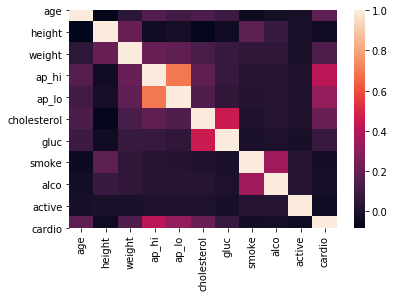

In [20]:
sns.heatmap(df.corr());

По предварительной оценки корреляции, видна зависимость признаков: <br>
<li> smoke - acho </li>
<li> cholesterol - gluc </li>
<li> ap_li - ap_ho </li>

Из этого можно сделать вывод, что люди курящие чаще пьют алкоголь.
А так же показатель количества глюкозы в крови сильно влияет на холестерин

In [21]:
df.groupby('cholesterol')['age'].mean()

cholesterol
1    53.205201
2    53.827109
3    55.786170
Name: age, dtype: float64

In [22]:
df.groupby('cardio')['age'].mean()

cardio
0    52.513575
1    54.624073
Name: age, dtype: float64

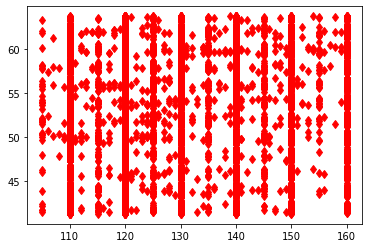

In [23]:
plt.plot(df['ap_hi'], df['age'], 'rd')

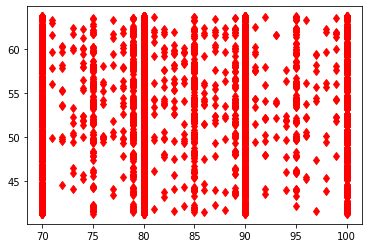

In [24]:
plt.plot(df['ap_lo'], df['age'], 'rd')

Высокое давление сильно влияет на сердце

In [28]:
df['ap_lo'].std()/2

3.6800372601921327

In [29]:
def AP_class(df):
    hi = df['ap_hi']
    lo = df['ap_lo']
    age = df['age']
    df['c_age'] = age.apply(lambda a: 1 if(a in np.arange(16, 21))
                             else(2 if(a in np.arange(21,41)) 
                                  else(3 if(a in np.arange(41, 61)) 
                                      else 4)))
    patterns = {1: (110, 75),
               2: (125, 75),
               3: (130, 80),
               4: (135, 80)}
    for i,j in df.groupby('c_age'):
        hi_std = j['ap_hi'].std()/2
        lo_std = j['ap_lo'].std()/2
        df['ap-rate'] = (j['ap_hi'].apply(lambda x: 0 if(x-patterns[i][0]==0) 
                          else(1 if(x-patterns[i][0]<=hi_std/2)
                               else 2)) & j['ap_lo'].apply(lambda x: 0 if(x-patterns[i][1]==0)
                                                           else(1 if(x-patterns[i][1]<=lo_std/2)
                                                                else 2)))

In [30]:
AP_class(df)

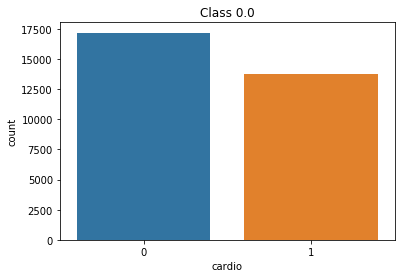

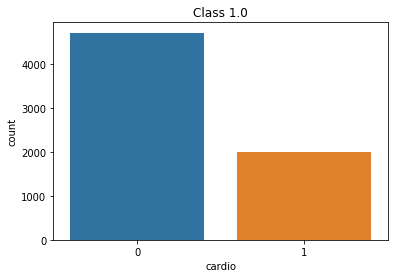

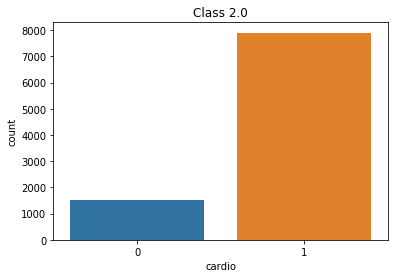

In [59]:
for i, j in df.groupby('ap-rate'):
    plt.figure()
    plt.title(f'Class {i}')
    sns.countplot(x='cardio', data=j)